<a href="https://colab.research.google.com/github/sramponi86/CAS_AIS_Text_Summarization/blob/main/CAS_ExtractiveSummarization_WIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

This notebook demonstrates the process of extractive summarization using AI techniques. Extractive summarization involves selecting important sentences from a text to create a summary. This can be particularly useful in managing large volumes of information efficiently. We will use natural language processing (NLP) libraries and machine learning models to identify and extract key sentences from a given text.

**Important** If you are running this notebook in JupyterHub, please restart the server and choose the environment *ETH_CAS_AIS Jupyter environment for project 5*.

We begin by installing some dependencies. These libraries include tools for processing language data and pre-trained models for generating sentence embeddings, which are numerical representations of sentences' meanings.

In [1]:
!pip install safetensors sentence_transformers ipyplot==1.1.0
!pip install transformers --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

Next, we import the libraries we will be using. `Spacy` is used for sentence tokenization, `SentenceTransformer` for generating sentence embeddings, and `numpy` for mathematical operations.

In [2]:
from spacy.lang.en import English
from sentence_transformers import SentenceTransformer
import numpy as np

We now initialize Spacy with the English language model and add a sentencizer component. This prepares us to split our text into individual sentences.

In [3]:
spacy = English()
spacy.add_pipe("sentencizer")

We now define a function to split texts into sentences. It is crucial for preparing our text for summarization.

In [4]:
def split(text):
  """
  Splits a text into sentences using the Spacy library.

  Parameters
  ----------
  text : str
      The text to be split into sentences.

  Returns
  -------
  list
      The list of sentences in the text.
  """
  processed_text = spacy(text)
  processed_sentences = processed_text.sents

  sentences = []
  for sentence in processed_sentences:
    sentences.append(sentence.text)

  return sentences

We now define a sample text to be summarized. This text will be processed through our summarization pipeline.

In [5]:
text = "You will rejoice to hear that no disaster has accompanied the \
commencement of an enterprise which you have regarded with such evil \
forebodings. I arrived here yesterday, and my first task is to assure \
my dear sister of my welfare and increasing confidence in the success \
of my undertaking. \
I am already far north of London, and as I walk in the streets of \
Petersburgh, I feel a cold northern breeze play upon my cheeks, which \
braces my nerves and fills me with delight. Do you understand this \
feeling? This breeze, which has travelled from the regions towards \
which I am advancing, gives me a foretaste of those icy climes. \
Inspirited by this wind of promise, my daydreams become more fervent \
and vivid. I try in vain to be persuaded that the pole is the seat of \
frost and desolation; it ever presents itself to my imagination as the \
region of beauty and delight. There, Margaret, the sun is for ever \
visible, its broad disk just skirting the horizon and diffusing a \
perpetual splendour. There—for with your leave, my sister, I will put \
some trust in preceding navigators—there snow and frost are banished; \
and, sailing over a calm sea, we may be wafted to a land surpassing in \
wonders and in beauty every region hitherto discovered on the habitable \
globe. Its productions and features may be without example, as the \
phenomena of the heavenly bodies undoubtedly are in those undiscovered \
solitudes. What may not be expected in a country of eternal light? I \
may there discover the wondrous power which attracts the needle and may \
regulate a thousand celestial observations that require only this \
voyage to render their seeming eccentricities consistent for ever. I \
shall satiate my ardent curiosity with the sight of a part of the world \
never before visited, and may tread a land never before imprinted by \
the foot of man. These are my enticements, and they are sufficient to \
conquer all fear of danger or death and to induce me to commence this \
laborious voyage with the joy a child feels when he embarks in a little \
boat, with his holiday mates, on an expedition of discovery up his \
native river. But supposing all these conjectures to be false, you \
cannot contest the inestimable benefit which I shall confer on all \
mankind, to the last generation, by discovering a passage near the pole \
to those countries, to reach which at present so many months are \
requisite; or by ascertaining the secret of the magnet, which, if at \
all possible, can only be effected by an undertaking such as mine. \
These reflections have dispelled the agitation with which I began my \
letter, and I feel my heart glow with an enthusiasm which elevates me \
to heaven, for nothing contributes so much to tranquillise the mind as \
a steady purpose—a point on which the soul may fix its intellectual \
eye. This expedition has been the favourite dream of my early years. I \
have read with ardour the accounts of the various voyages which have \
been made in the prospect of arriving at the North Pacific Ocean \
through the seas which surround the pole. You may remember that a \
history of all the voyages made for purposes of discovery composed the \
whole of our good Uncle Thomas’ library. My education was neglected, \
yet I was passionately fond of reading. These volumes were my study \
day and night, and my familiarity with them increased that regret which \
I had felt, as a child, on learning that my father’s dying injunction \
had forbidden my uncle to allow me to embark in a seafaring life. \
These visions faded when I perused, for the first time, those poets \
whose effusions entranced my soul and lifted it to heaven. I also \
became a poet and for one year lived in a paradise of my own creation; \
I imagined that I also might obtain a niche in the temple where the \
names of Homer and Shakespeare are consecrated. You are well \
acquainted with my failure and how heavily I bore the disappointment. \
But just at that time I inherited the fortune of my cousin, and my \
thoughts were turned into the channel of their earlier bent. \
Six years have passed since I resolved on my present undertaking. I \
can, even now, remember the hour from which I dedicated myself to this \
great enterprise. I commenced by inuring my body to hardship. I \
accompanied the whale-fishers on several expeditions to the North Sea; \
I voluntarily endured cold, famine, thirst, and want of sleep; I often \
worked harder than the common sailors during the day and devoted my \
nights to the study of mathematics, the theory of medicine, and those \
branches of physical science from which a naval adventurer might derive \
the greatest practical advantage. Twice I actually hired myself as an \
under-mate in a Greenland whaler, and acquitted myself to admiration. I \
must own I felt a little proud when my captain offered me the second \
dignity in the vessel and entreated me to remain with the greatest \
earnestness, so valuable did he consider my services."

personal_text = ""

The next cell applies the previously defined `split` function to our text and prints the individual sentences, allowing us to see how the text has been divided.

In [6]:
sentences = split(text)
print("\n\n".join(sentences))

You will rejoice to hear that no disaster has accompanied the commencement of an enterprise which you have regarded with such evil forebodings.

I arrived here yesterday, and my first task is to assure my dear sister of my welfare and increasing confidence in the success of my undertaking.

I am already far north of London, and as I walk in the streets of Petersburgh, I feel a cold northern breeze play upon my cheeks, which braces my nerves and fills me with delight.

Do you understand this feeling?

This breeze, which has travelled from the regions towards which I am advancing, gives me a foretaste of those icy climes.

Inspirited by this wind of promise, my daydreams become more fervent and vivid.

I try in vain to be persuaded that the pole is the seat of frost and desolation; it ever presents itself to my imagination as the region of beauty and delight.

There, Margaret, the sun is for ever visible, its broad disk just skirting the horizon and diffusing a perpetual splendour.

Ther

We now load a pre-trained model to generate embeddings for each sentence. These embeddings capture the semantic meaning of sentences in a high-dimensional space.

In [7]:
model = SentenceTransformer('all-MiniLM-L6-v2')
sentence_embeddings = model.encode(sentences)
print(f'This {sentence_embeddings[0].shape[0]}-dimensional vector is an abstract representation of the sentence:')
print(sentences[0])
print(sentence_embeddings[0])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

This 384-dimensional vector is an abstract representation of the sentence:
You will rejoice to hear that no disaster has accompanied the commencement of an enterprise which you have regarded with such evil forebodings.
[ 9.26571414e-02  3.83942941e-04  7.21267834e-02 -2.34810691e-02
  1.22959577e-02  9.43259150e-03 -1.25738205e-02 -4.31905016e-02
  5.49764559e-03 -4.70927209e-02 -3.42408679e-02  4.26237583e-02
  6.31729215e-02 -4.23946530e-02 -5.29181957e-02 -9.12883133e-03
 -1.16950143e-02 -7.83671364e-02  2.99732969e-03  6.17795214e-02
 -6.40610158e-02  2.70157829e-02 -4.12756726e-02  2.13825740e-02
 -2.60088444e-02  2.87592709e-02  8.65901448e-03  1.53875174e-02
 -5.19347414e-02 -3.85582708e-02  9.72963683e-03 -5.25054112e-02
 -3.58221754e-02  5.03197946e-02  8.80040601e-02  2.98890769e-02
  8.38397164e-03 -2.25976575e-02  9.76823829e-03 -6.10247366e-02
  4.22321633e-02 -4.98389378e-02 -5.92223220e-02 -7.45773967e-03
 -8.98339599e-03 -5.94674684e-02 -6.10520430e-02 -6.98621497e-02
 

This section clusters the sentence embeddings into groups using KMeans clustering. This helps in identifying sentences with similar meanings, which can be useful for summarization.

In [8]:
from sklearn.cluster import KMeans

k = 4

kmeans = KMeans(n_clusters=k, n_init="auto")
cluster_ids = kmeans.fit_predict(sentence_embeddings)

clustered_sentences = {i: [] for i in range(k)}
clustered_embeddings = {i: [] for i in range(k)}
for sentence, embedding, cluster_id in zip(sentences, sentence_embeddings, cluster_ids):
  clustered_sentences[cluster_id].append(sentence)
  clustered_embeddings[cluster_id].append(embedding)

for cluster_id, sentence_list in clustered_sentences.items():
  print(f"Cluster {cluster_id} consists of the following sentences:")
  for sentence in sentence_list:
    print("   " + sentence)

Cluster 0 consists of the following sentences:
   I am already far north of London, and as I walk in the streets of Petersburgh, I feel a cold northern breeze play upon my cheeks, which braces my nerves and fills me with delight.
   This breeze, which has travelled from the regions towards which I am advancing, gives me a foretaste of those icy climes.
   Inspirited by this wind of promise, my daydreams become more fervent and vivid.
   I try in vain to be persuaded that the pole is the seat of frost and desolation; it ever presents itself to my imagination as the region of beauty and delight.
   There, Margaret, the sun is for ever visible, its broad disk just skirting the horizon and diffusing a perpetual splendour.
   There—for with your leave, my sister, I will put some trust in preceding navigators—there snow and frost are banished; and, sailing over a calm sea, we may be wafted to a land surpassing in wonders and in beauty every region hitherto discovered on the habitable globe.


We now compute for each cluster, its *prototypical sentence*. This is the sentence whose embedding is the closest to the cluster's center of mass. In other words, this is the word that is the closest to all other embeddings in the cluster. We begin this by defining two auxiliary functions.

In [9]:
def euclidean_distance(u, v):
  return np.linalg.norm(u - v)

def find_prototypical(centroid, vectors):
  distances = []
  for vector in vectors:
    d = euclidean_distance(centroid, vector)
    distances.append(d)

  index_closest_vector = 0
  closest_dist = distances[0]
  for i, di in enumerate(distances):
    if di < closest_dist:
      index_closest_vector = i
      closest_dist = di

  return index_closest_vector

In [10]:
# Obtain cluster centroids from k-Means
cluter_centroids = kmeans.cluster_centers_

# This dictionary stores the indices of the prototypical sentences
prototypical_sentence_indices = {}

# Loop through clusters
for cluster_id in range(k):

  # Get cluster centroid
  cluster_centroid = cluter_centroids[cluster_id]

  # Get cluster embeddings
  cluster_embeddings = clustered_embeddings[cluster_id]

  # Find the prototypical embedding in this cluster
  prototypical_index = find_prototypical(cluster_centroid, cluster_embeddings)

  # And store its index
  prototypical_sentence_indices[cluster_id] = prototypical_index


# Now we arrange the sentences accordingly
prototypical_sentences = []
for cluster_id in range(k):

  # Get the sentences in this cluster
  cluster_sentences = clustered_sentences[cluster_id]

  # Get the index of the prototypical sentence
  prototypical_sentence_index = prototypical_sentence_indices[cluster_id]

  # Store the prototypical sentence
  prototypical_sentences.append(
    cluster_sentences[prototypical_sentence_index]
  )


# We now have the k summary sentences that we were looking for...
# but they are shuffled as a result of the clustering
original_indices = []
for sent in prototypical_sentences:
  original_indices.append(sentences.index(sent))

# We re-organize them based on their original order in the document
new_indices = np.argsort(original_indices)
prototypical_sentences = [prototypical_sentences[i] for i in new_indices]

extractive_summary_sentences = prototypical_sentences

Finally, we project the sentence embeddings into a 2-dimensional space and color the embeddings according to the clusters they belong.

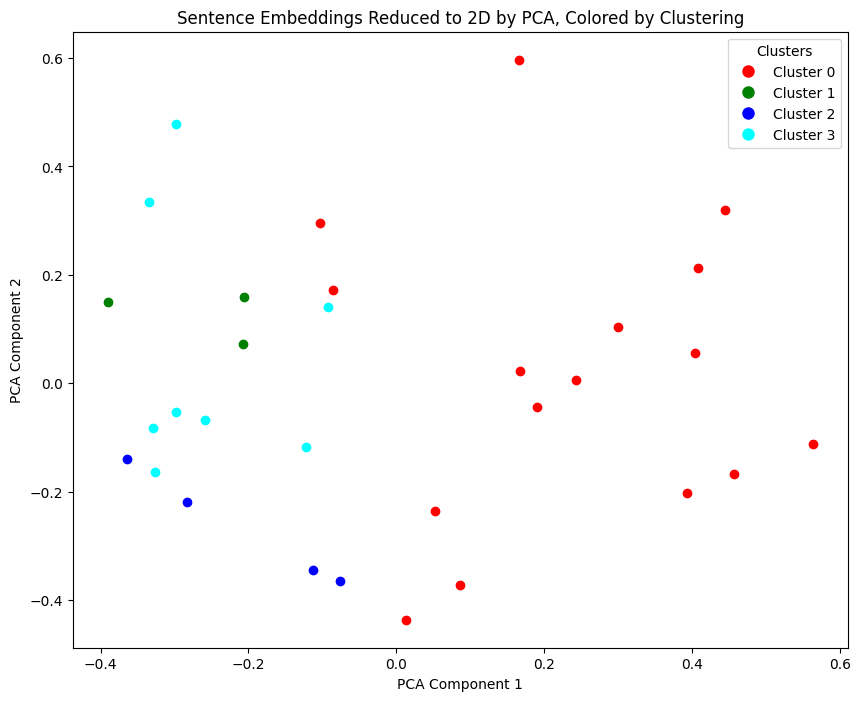

In [11]:
# Import necessary libraries for PCA and plotting
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Initialize PCA to reduce to 2 dimensions
pca = PCA(n_components=2)

# Apply PCA to the sentence embeddings
sentence_embeddings_2d = pca.fit_transform(sentence_embeddings)

# Prepare colors; if you have more than 8 clusters, extend this list of colors
colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'black', 'orange']

# Plot each sentence embedding in the 2D space, colored by its cluster
plt.figure(figsize=(10, 8))  # Set the figure size
for i, embedding in enumerate(sentence_embeddings_2d):
    plt.scatter(embedding[0], embedding[1], color=colors[cluster_ids[i]], label=f'Cluster {cluster_ids[i]}')

# Optional: add a legend. This might make the plot crowded if there are many points.
# To improve the legend, we're creating custom legend entries to avoid duplicates
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=col, markersize=10, label=f'Cluster {i}') for i, col in enumerate(colors[:k])]
plt.legend(handles=legend_elements, loc='best', title="Clusters")

plt.title('Sentence Embeddings Reduced to 2D by PCA, Colored by Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [12]:
print('Summary sentences:\n')
for i, sent in enumerate(extractive_summary_sentences, start=1):
  print(i, sent)

Summary sentences:

1 I arrived here yesterday, and my first task is to assure my dear sister of my welfare and increasing confidence in the success of my undertaking.
2 There—for with your leave, my sister, I will put some trust in preceding navigators—there snow and frost are banished; and, sailing over a calm sea, we may be wafted to a land surpassing in wonders and in beauty every region hitherto discovered on the habitable globe.
3 You are well acquainted with my failure and how heavily I bore the disappointment.
4 I accompanied the whale-fishers on several expeditions to the North Sea; I voluntarily endured cold, famine, thirst, and want of sleep; I often worked harder than the common sailors during the day and devoted my nights to the study of mathematics, the theory of medicine, and those branches of physical science from which a naval adventurer might derive the greatest practical advantage.


## Practical questions

1. Use a different text from your own choice. Identify the sentences that, in your opinion, should appear in the final summary. Then run the summarizer and discuss how well this text summarizer works for this text.

2. Try different numbers of clusters and see the resulting summary. In your opinion, which number of clusters is ideal for your text of choice?